In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Загрузка данных
data=pd.read_csv('/Users/annalavrikova/Downloads/LTV.csv')

In [58]:
#Посмотрим на данные
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
#Посмотрим информацию о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

Всего 24 фичи:

8 числовых

14 категориальных

1 колонка с ID пользователя

1 колонка с датой (срок действия страховки)

Целевая фича - Customer Lifetime Value

In [5]:
#Посмотрим на наличие пропущенных значений
data.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [118]:
# Поменяем тип Effective To Date:
data['Effective To Date'] = pd.to_datetime(data['Effective To Date'])

In [119]:
data['Effective To Date'] = data['Effective To Date'].astype(np.int64) // 10 ** 9

Пропущенных значений нет

In [143]:
#Числовые признаки
num_cols=[
    'Customer Lifetime Value',
    'Income',
    'Monthly Premium Auto',
    'Months Since Last Claim',
    'Months Since Policy Inception',
    'Number of Open Complaints',
    'Number of Policies',
    'Total Claim Amount',
    'Effective To Date'
]

#Категориальные признаки
cat_cols=[
    'State',
    'Response',
    'Coverage',
    'Education',
    'EmploymentStatus',
    'Gender',
    'Location Code',
    'Marital Status',
    'Policy Type',
    'Policy',
    'Renew Offer Type',
    'Sales Channel',
    'Vehicle Class',
    'Vehicle Size',
]

#Другие
other_cols=[
    'Customer'
]

#Люди
people=[
    'State',
    'Response',
    'Education',
    'EmploymentStatus',
    'Gender',
    'Location Code',
    'Marital Status'
]

#Полис
policy=[
    'Coverage',
    'Policy Type',
    'Policy',
    'Renew Offer Type',
    'Sales Channel'
]

#Автомобиль
cars=[
    'Vehicle Class',
    'Vehicle Size'
]

## Анализ числовых признаков

In [144]:
#Корреляция между числовыми признаками
data.corr()

,Customer Lifetime Value,Effective To Date,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,-0.004844,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Effective To Date,-0.004844,1.000000,-0.016395,0.004793,-0.007125,0.001300,0.007153,0.010620,0.003308
Income,0.024366,-0.016395,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,0.004793,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.007125,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,0.001300,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.007153,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,0.010620,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,0.003308,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


Как видно из таблицы попарной корреляции, Monthly Premium Auto и Total Claim Amount имеют значительную положительную корреляцию с целевой переменной

In [10]:
#Посмотрим на heatmap
from mlxtend.plotting import heatmap

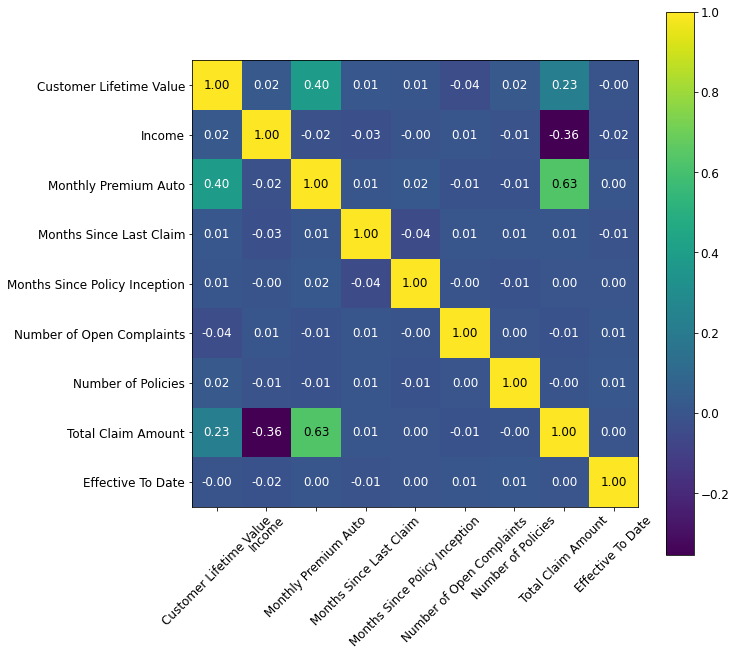

In [145]:
cm=np.corrcoef(data[num_cols].values.T)
hm=heatmap(cm, row_names=num_cols, column_names=num_cols, figsize=(10, 10))

По heat mapвидно, что целевая переменная имеет положительную корреляцию с Monthly Premium Auto и Total Claim Amount

In [14]:
#Посмотрим на статистические данные целевой переменной
data['Customer Lifetime Value'].describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

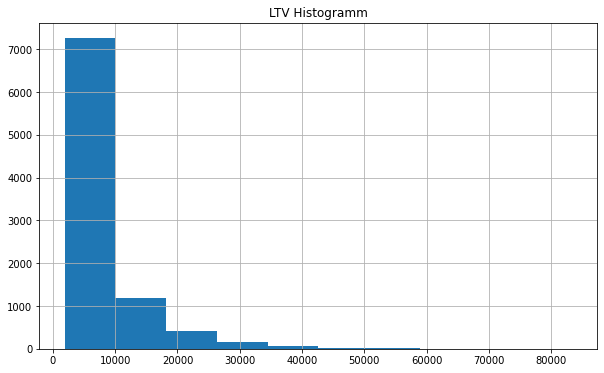

In [15]:
#Построим гистрограмму
data['Customer Lifetime Value'].hist(figsize=(10, 6))
plt.title('LTV Histogramm')
None

Максимальный LTV: 83325.38  
Минимальный LTV: 1898.00  
Средний LTV: 8004.94

Глядя на гистрограмму можно сделать следующие выводы:
1) Распределение является ассиметричным, распределено ненормально; 
2) Большинство значений LTV лежат слева от среднего и соответственно у распределения имеется большой хвост;

In [16]:
#Посмотрим на статистические данные Monthly Premium Auto
data['Monthly Premium Auto'].describe()

count    9134.000000
mean       93.219291
std        34.407967
min        61.000000
25%        68.000000
50%        83.000000
75%       109.000000
max       298.000000
Name: Monthly Premium Auto, dtype: float64

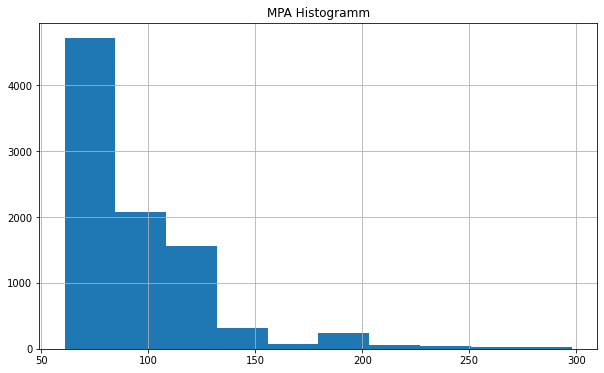

In [17]:
#Построим гистрограмму
data['Monthly Premium Auto'].hist(figsize=(10, 6))
plt.title('MPA Histogramm')
None

Максимальный MPA: 298  
Минимальный MPA: 61  
Средний MPA: 93.2

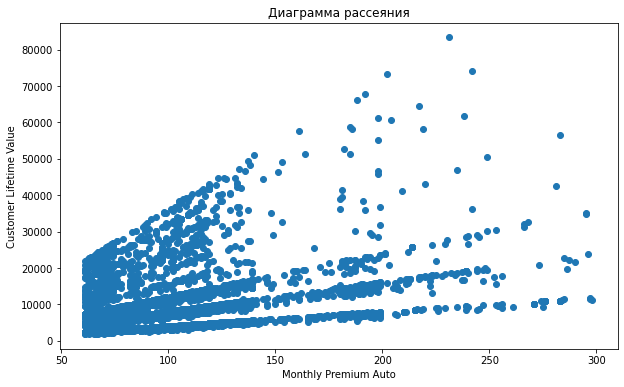

In [18]:
plt.figure(figsize=(10, 6))
plt.xlabel('Monthly Premium Auto')
plt.ylabel('Customer Lifetime Value')
plt.title('Диаграмма рассеяния')
plt.scatter(data['Monthly Premium Auto'], data['Customer Lifetime Value'])
None

Между MPA и целевой переменной имеется положительная корреляция с коэффициентом 0.396, в след за MPA растет так же и целевая переменная

In [19]:
#Посмотрим на статистические данные Total Claim Amount
data['Total Claim Amount'].describe()

count    9134.000000
mean      434.088794
std       290.500092
min         0.099007
25%       272.258244
50%       383.945434
75%       547.514839
max      2893.239678
Name: Total Claim Amount, dtype: float64

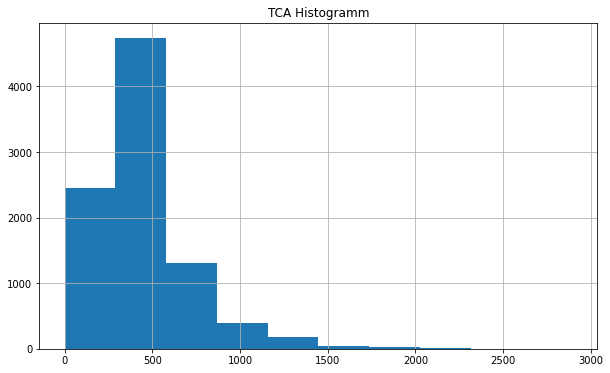

In [20]:
data['Total Claim Amount'].hist(figsize=(10, 6))
plt.title('TCA Histogramm')
None

Максимальная TCA: 2893.23  
Минимальная TCA: 0.09  
Средняя TCA: 434.08

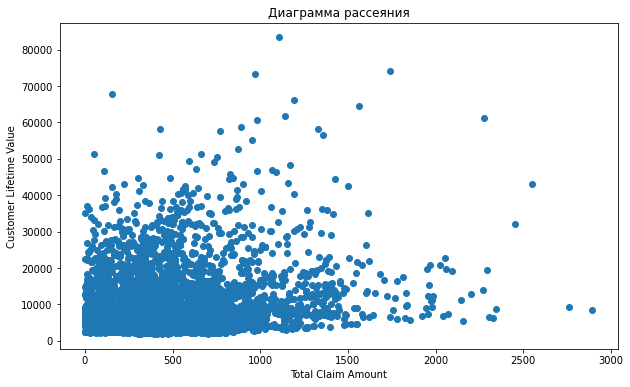

In [21]:
plt.figure(figsize=(10, 6))
plt.xlabel('Total Claim Amount')
plt.ylabel('Customer Lifetime Value')
plt.title('Диаграмма рассеяния')
plt.scatter(data['Total Claim Amount'], data['Customer Lifetime Value'])
None

Между TCA и целевой переменной имеется положительная корреляция с коэффициентом 0.226, в след за TCA растет так же и целевая переменная

In [22]:
other=[
    'Income',
    'Months Since Last Claim',
    'Months Since Policy Inception',
    'Number of Open Complaints',
    'Number of Policies'
]

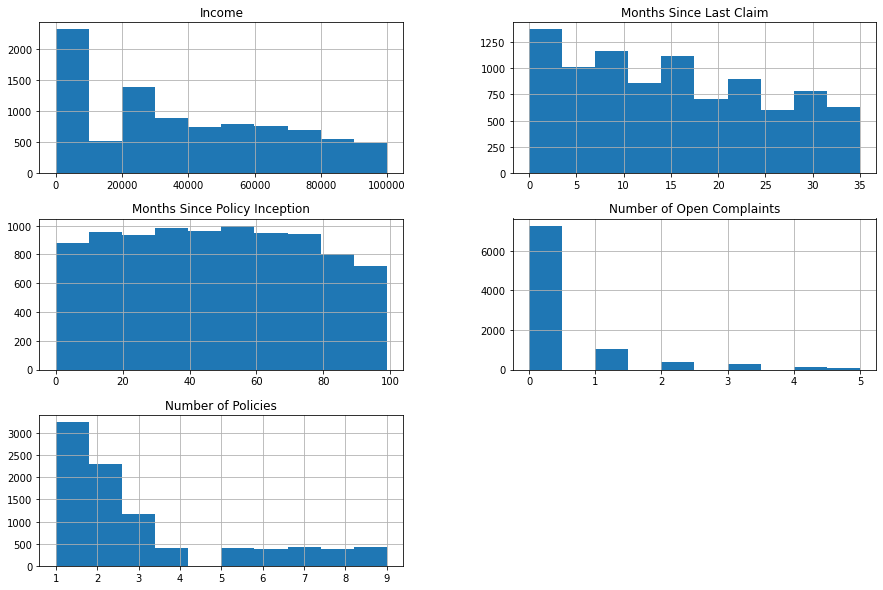

In [23]:
#Теперь взглянем на гистрограммы и диаграммы рассеивания для других числовых переменных
data[other].hist(figsize=(15, 10))
None

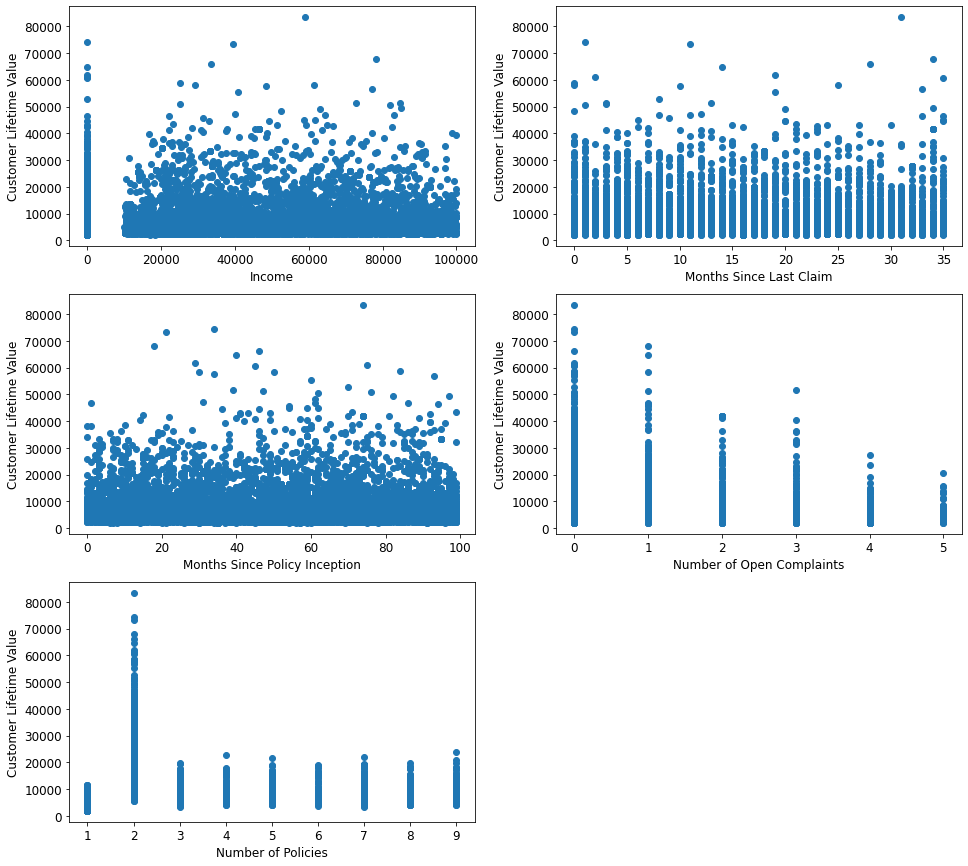

In [128]:
figure=plt.figure(figsize=(16, 15))
plt.rcParams.update({'font.size': 12})
cols, rows = 2, 3
for i in range(1, cols * rows):
    figure.add_subplot(rows, cols, i)
    plt.xlabel(other[i-1])
    plt.ylabel('Customer Lifetime Value')
    plt.scatter(data[other[i-1]], data['Customer Lifetime Value'])
plt.show()

Как видно из диаграмм заметной корреляции между Income, Months Since Last Claim, Months Since Policy Inception, Number of Open Complaints, Number of Policies и целевой переменной не наблюдается

## Анализ категориальных переменных

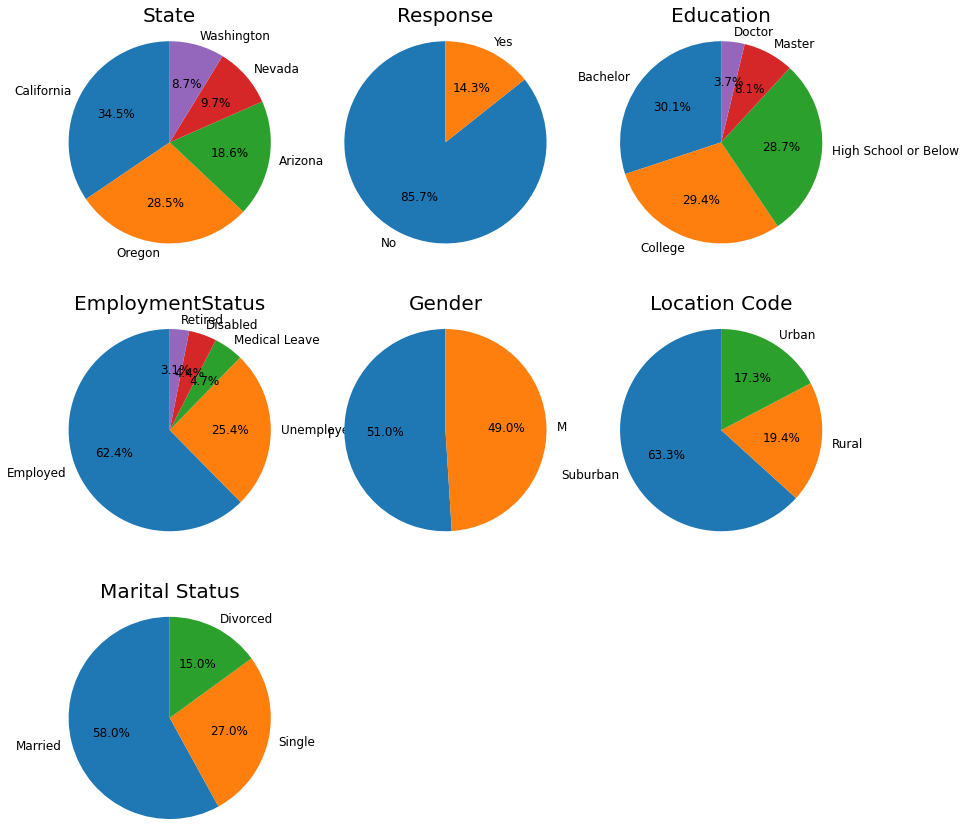

In [25]:
#Люди
figure=plt.figure(figsize=(14, 15))
plt.rcParams.update({'font.size': 12})
cols, rows = 3, 3
for i in range(1, 8):
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.title(people[i-1], fontdict={'fontsize':20})
    plt.pie(data[people[i-1]].value_counts(), labels=data[people[i-1]].value_counts().index, autopct='%1.1f%%',
        shadow=False, startangle=90, radius=1.1)
plt.show()

Как видно из круговых диаграмм:  
Количество клиентов женщин и мужчин примерно одинаковое  
Клиенты в равной степени являются бакалаврами, выпускниками средних школ и колледжей  
Большинство клиентов проживают в штатах Калифорния, Орегон и Аризона в пригородах  
В подавляющем большинстве клиенты не взаимодействуют с рекламой  
Большинство клиентов трудоустроены и состоят в браке

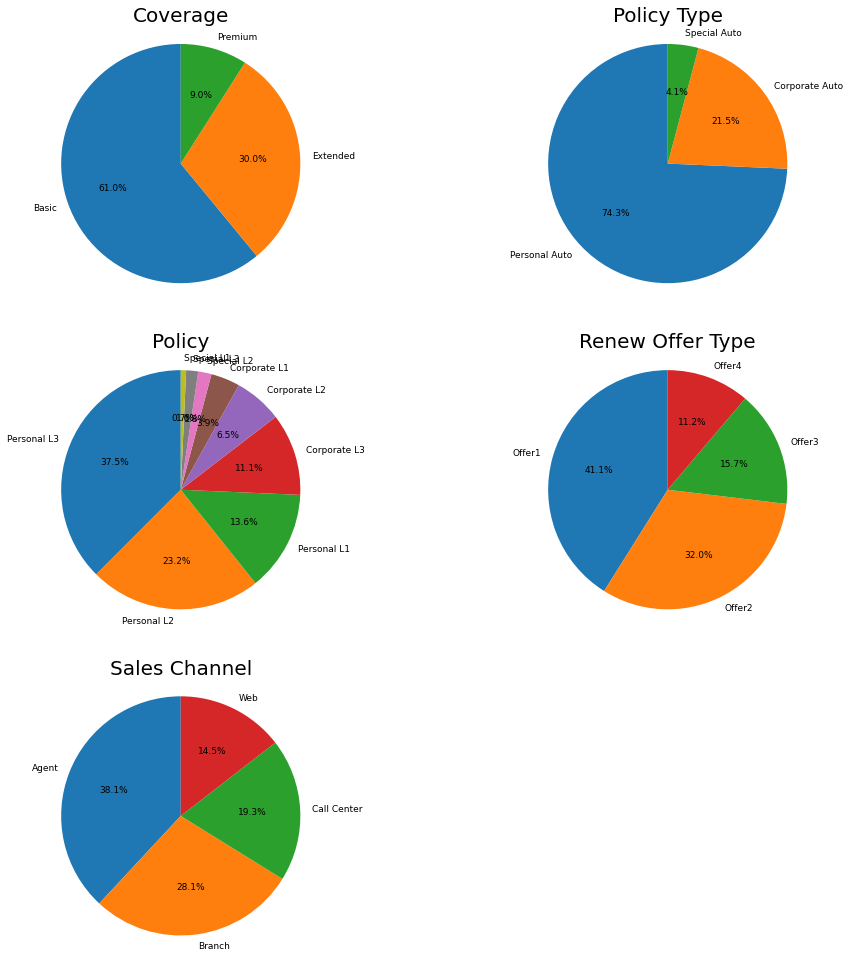

In [26]:
#Полис
figure=plt.figure(figsize=(16, 17))
plt.rcParams.update({'font.size': 9})
cols, rows = 2, 3
for i in range(1, 6):
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.title(policy[i-1], fontdict={'fontsize':20})
    plt.pie(data[policy[i-1]].value_counts(), labels=data[policy[i-1]].value_counts().index, autopct='%1.1f%%',
        shadow=False, startangle=90, radius=1.1)
plt.show()

Как видно из диаграмм:  
Большинство клиентов страхуют личные автомобили с базовым страховым покрытием

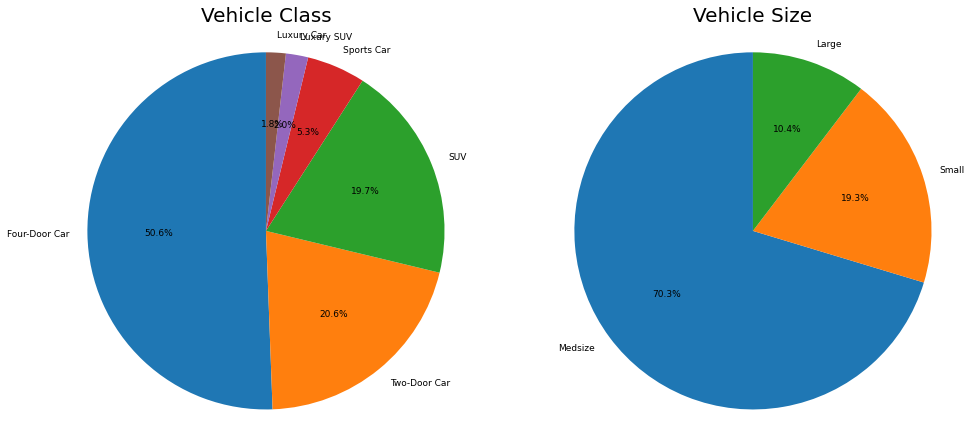

In [27]:
#Автомобили
figure=plt.figure(figsize=(16, 17))
plt.rcParams.update({'font.size': 9})
cols, rows = 2, 1
for i in range(1, 3):
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.title(cars[i-1], fontdict={'fontsize':20})
    plt.pie(data[cars[i-1]].value_counts(), labels=data[cars[i-1]].value_counts().index, autopct='%1.1f%%',
        shadow=False, startangle=90, radius=1.1)
plt.show()

Как видно из диаграмм у большинства клиентов четырехдверный или двухдверный автомобиль среднего размера

                 sum_LTV
State                   
Arizona     1.338786e+07
California  2.521149e+07
Nevada      7.106015e+06
Oregon      2.101062e+07
Washington  6.401135e+06


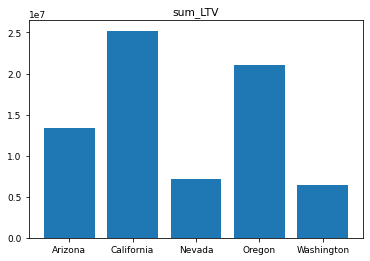

In [28]:
#Посмотрим суммарный LTV по штатам
state_sum_LTV=data.groupby('State')\
.agg({'Customer Lifetime Value':'sum'})\
.rename(columns={'Customer Lifetime Value':'sum_LTV'})
print(state_sum_LTV)
plt.bar(state_sum_LTV.index, state_sum_LTV['sum_LTV'])
plt.title('sum_LTV')
None

Как видно наибольшую прибыль приносят компании клиенты из Калифорнии и Орегона

               sum_LTV
Response              
No        6.284295e+07
Yes       1.027417e+07


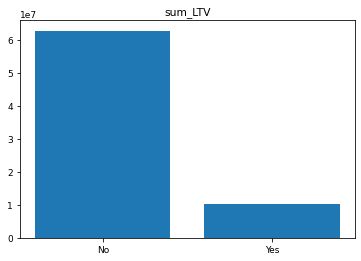

In [29]:
#Суммарный LTV клиентов по взаимодействию с рекламой
response_sum_LTV=data.groupby('Response')\
.agg({'Customer Lifetime Value':'sum'})\
.rename(columns={'Customer Lifetime Value':'sum_LTV'})
print(response_sum_LTV)
plt.bar(response_sum_LTV.index, response_sum_LTV['sum_LTV'])
plt.title('sum_LTV')
None

               sum_LTV
Coverage              
Basic     4.003785e+07
Extended  2.410130e+07
Premium   8.977977e+06


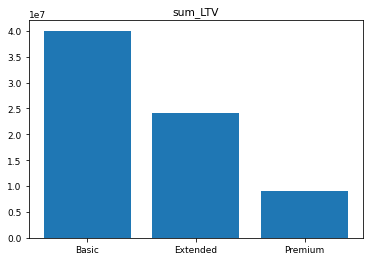

In [30]:
#Суммарный LTV по типу страхового покрытия
coverage_sum_LTV=data.groupby('Coverage')\
.agg({'Customer Lifetime Value':'sum'})\
.rename(columns={'Customer Lifetime Value':'sum_LTV'})
print(coverage_sum_LTV)
plt.bar(coverage_sum_LTV.index, coverage_sum_LTV['sum_LTV'])
plt.title('sum_LTV')
None

Клиенты оформившие базовый страховой полис приносят больший LTV

                           sum_LTV
Education                         
Bachelor              2.163407e+07
College               2.104870e+07
Doctor                2.571958e+06
High School or Below  2.175397e+07
Master                6.108422e+06


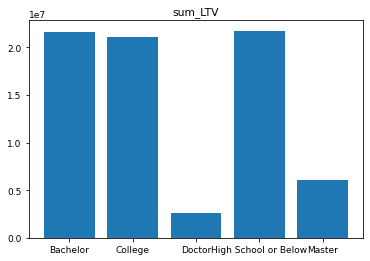

In [375]:
#Суммарный LTV по уровню образования
education_sum_LTV=data.groupby('Education')\
.agg({'Customer Lifetime Value':'sum'})\
.rename(columns={'Customer Lifetime Value':'sum_LTV'})
print(education_sum_LTV)
plt.bar(education_sum_LTV.index, education_sum_LTV['sum_LTV'])
plt.title('sum_LTV')
None

Люди имеющие степень бакалавра, а также окончившие колледж или высшую школу наиболее ценны для компании

                       sum_LTV
EmploymentStatus              
Disabled          3.178395e+06
Employed          4.683253e+07
Medical Leave     3.301267e+06
Retired           2.111578e+06
Unemployed        1.769335e+07


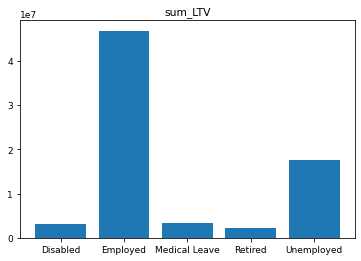

In [376]:
#Суммарный LTV по трудоустройству
EmploymentStatus_sum_LTV=data.groupby('EmploymentStatus')\
.agg({'Customer Lifetime Value':'sum'})\
.rename(columns={'Customer Lifetime Value':'sum_LTV'})
print(EmploymentStatus_sum_LTV)
plt.bar(EmploymentStatus_sum_LTV.index, EmploymentStatus_sum_LTV['sum_LTV'])
plt.title('sum_LTV')
None

Трудоустроенные люди приносят больший LTV для компании

             sum_LTV
Gender              
F       3.771397e+07
M       3.540315e+07


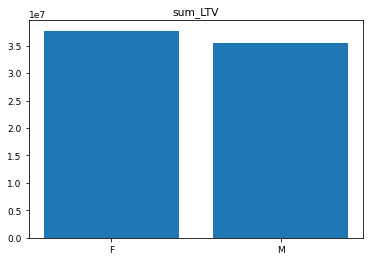

In [377]:
#Суммарный LTV по полу
Gender_sum_LTV=data.groupby('Gender')\
.agg({'Customer Lifetime Value':'sum'})\
.rename(columns={'Customer Lifetime Value':'sum_LTV'})
print(Gender_sum_LTV)
plt.bar(Gender_sum_LTV.index, Gender_sum_LTV['sum_LTV'])
plt.title('sum_LTV')
None

Заметная разница в прибыли от мужчин и женщин не обнаруживается

                    sum_LTV
Location Code              
Rural          1.410191e+07
Suburban       4.625776e+07
Urban          1.275746e+07


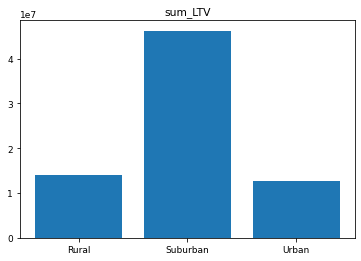

In [378]:
#Суммарный LTV по типу местности
Location_Code_sum_LTV=data.groupby('Location Code')\
.agg({'Customer Lifetime Value':'sum'})\
.rename(columns={'Customer Lifetime Value':'sum_LTV'})
print(Location_Code_sum_LTV)
plt.bar(Location_Code_sum_LTV.index, Location_Code_sum_LTV['sum_LTV'])
plt.title('sum_LTV')
None

Люди живущие в городах и пригородах более ценны, чем жители деревень

                     sum_LTV
Marital Status              
Divorced        1.128226e+07
Married         4.280237e+07
Single          1.903250e+07


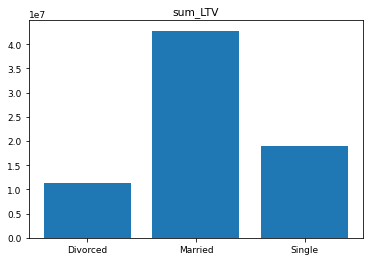

In [379]:
#Суммарный LTV по семейному положению
Marital_Status_sum_LTV=data.groupby('Marital Status')\
.agg({'Customer Lifetime Value':'sum'})\
.rename(columns={'Customer Lifetime Value':'sum_LTV'})
print(Marital_Status_sum_LTV)
plt.bar(Marital_Status_sum_LTV.index, Marital_Status_sum_LTV['sum_LTV'])
plt.title('sum_LTV')
None

Люди, состоящие в браке приносят наибольшую прибыль компании

                     sum_LTV
Policy Type                 
Corporate Auto  1.537876e+07
Personal Auto   5.448974e+07
Special Auto    3.248625e+06


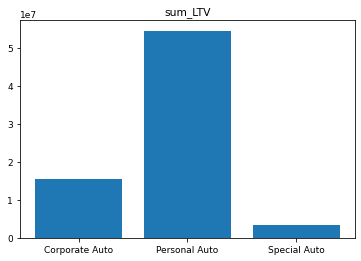

In [363]:
#Суммарный LTV по типу автомобиля
Policy_Type_sum_LTV=data.groupby('Policy Type')\
.agg({'Customer Lifetime Value':'sum'})\
.rename(columns={'Customer Lifetime Value':'sum_LTV'})
print(Policy_Type_sum_LTV)
plt.bar(Policy_Type_sum_LTV.index, Policy_Type_sum_LTV['sum_LTV'])
plt.title('sum_LTV')
None

Клиенты имеющие персональный полис приносят большую прибыль, в сравнении с корпоративными и специальными полисами

                   sum_LTV
Policy                    
Corporate L1  3.042499e+06
Corporate L2  4.520629e+06
Corporate L3  7.815630e+06
Personal L1   9.907305e+06
Personal L2   1.709252e+07
Personal L3   2.748992e+07
Special L1    5.499624e+05
Special L2    1.365613e+06
Special L3    1.333050e+06


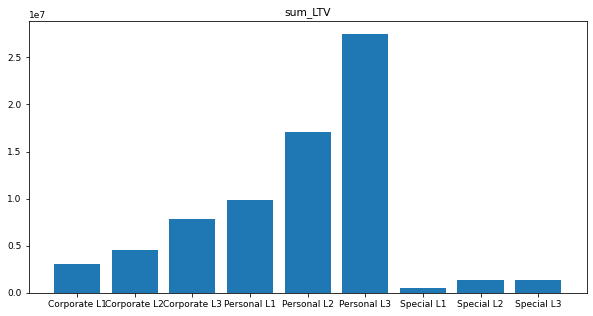

In [365]:
#Суммарный LTV по типу полиса
Policy_sum_LTV=data.groupby('Policy')\
.agg({'Customer Lifetime Value':'sum'})\
.rename(columns={'Customer Lifetime Value':'sum_LTV'})
print(Policy_sum_LTV)
plt.figure(figsize=(10, 5))
plt.bar(Policy_sum_LTV.index, Policy_sum_LTV['sum_LTV'])
plt.title('sum_LTV')
None

Наибольшую прибыль приносят клиенты, имеющие Personal L3 полис

                       sum_LTV
Renew Offer Type              
Offer1            3.266899e+07
Offer2            2.164290e+07
Offer3            1.145297e+07
Offer4            7.352266e+06


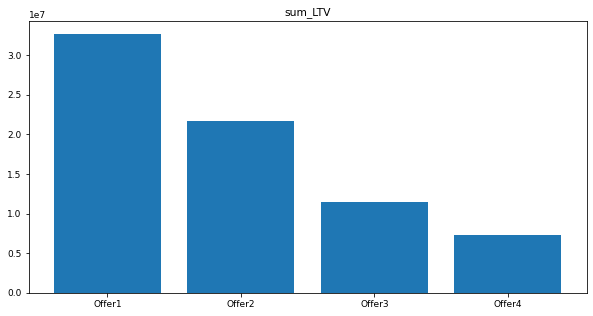

In [367]:
#Суммарный LTV по типу предложения
Renew_Offer_Type_sum_LTV=data.groupby('Renew Offer Type')\
.agg({'Customer Lifetime Value':'sum'})\
.rename(columns={'Customer Lifetime Value':'sum_LTV'})
print(Renew_Offer_Type_sum_LTV)
plt.figure(figsize=(10, 5))
plt.bar(Renew_Offer_Type_sum_LTV.index, Renew_Offer_Type_sum_LTV['sum_LTV'])
plt.title('sum_LTV')
None

Предложения Offer 1 и Offer 2 привлекают больше клиентов

                    sum_LTV
Sales Channel              
Agent          2.766896e+07
Branch         2.084330e+07
Call Center    1.429665e+07
Web            1.030822e+07


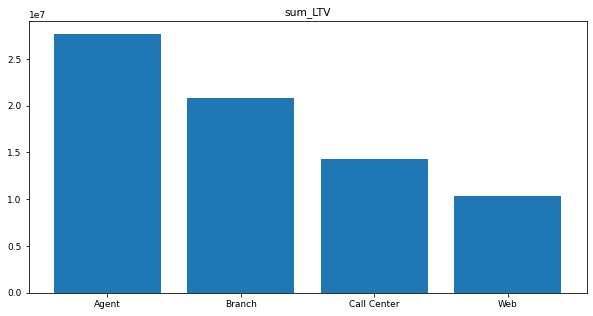

In [368]:
#Суммарный LTV по типу канала продаж
Sales_Channel_sum_LTV=data.groupby('Sales Channel')\
.agg({'Customer Lifetime Value':'sum'})\
.rename(columns={'Customer Lifetime Value':'sum_LTV'})
print(Sales_Channel_sum_LTV)
plt.figure(figsize=(10, 5))
plt.bar(Sales_Channel_sum_LTV.index, Sales_Channel_sum_LTV['sum_LTV'])
plt.title('sum_LTV')
None

Агенты работают лучше других каналов

                    sum_LTV
Vehicle Class              
Four-Door Car  3.064521e+07
Luxury Car     2.779696e+06
Luxury SUV     3.150632e+06
SUV            1.875655e+07
Sports Car     5.203479e+06
Two-Door Car   1.258156e+07


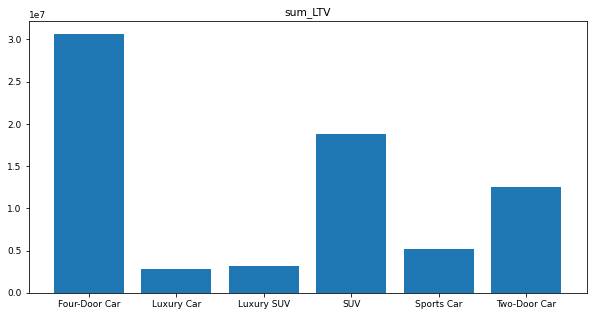

In [370]:
#Суммарный LTV по классу авто
Vehicle_Class_sum_LTV=data.groupby('Vehicle Class')\
.agg({'Customer Lifetime Value':'sum'})\
.rename(columns={'Customer Lifetime Value':'sum_LTV'})
print(Vehicle_Class_sum_LTV)
plt.figure(figsize=(10, 5))
plt.bar(Vehicle_Class_sum_LTV.index, Vehicle_Class_sum_LTV['sum_LTV'])
plt.title('sum_LTV')
None

Клиенты имеющие четырехдверный автомобиль или внедорожник наиболее ценны

                   sum_LTV
Vehicle Size              
Large         7.137566e+06
Medsize       5.171745e+07
Small         1.426211e+07


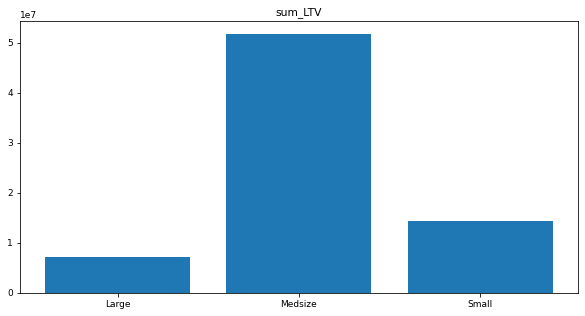

In [371]:
#Суммарный LTV по размеру авто
Vehicle_Size_sum_LTV=data.groupby('Vehicle Size')\
.agg({'Customer Lifetime Value':'sum'})\
.rename(columns={'Customer Lifetime Value':'sum_LTV'})
print(Vehicle_Size_sum_LTV)
plt.figure(figsize=(10, 5))
plt.bar(Vehicle_Size_sum_LTV.index, Vehicle_Size_sum_LTV['sum_LTV'])
plt.title('sum_LTV')
None

Клиенты имеющие автомобиль среднего размера приносят наибольшую прибыль

Выводы:  
Как видно наибольшую прибыль приносят компании клиенты из Калифорнии и Орегона  
Клиенты оформившие базовый страховой полис приносят больший LTV 
Люди имеющие степень бакалавра, а также окончившие колледж или высшую школу наиболее ценны для компании  
Трудоустроенные люди приносят больший LTV для компании  
Заметная разница в прибыли от мужчин и женщин не обнаруживается  
Люди живущие в городах и пригородах более ценны, чем жители деревень  
Люди, состоящие в браке приносят наибольшую прибыль компании  
Клиенты имеющие персональный полис приносят большую прибыль, в сравнении с корпоративными и специальными полисами  
Наибольшую прибыль приносят клиенты, имеющие Personal L3 полис  
Предложения Offer 1 и Offer 2 привлекают больше клиентов  
Агенты работают лучше других каналов  
Клиенты имеющие четырехдверный автомобиль или внедорожник наиболее ценны  
Клиенты имеющие автомобиль среднего размера приносят наибольшую прибыль

## Линейная регрессия

In [146]:
#Числовые признаки
num_cols=[
    'Income',
    'Monthly Premium Auto',
    'Months Since Last Claim',
    'Months Since Policy Inception',
    'Number of Open Complaints',
    'Number of Policies',
    'Total Claim Amount',
    'Effective To Date'
]

#Категориальные признаки
cat_cols=[
    'State',
    'Response',
    'Coverage',
    'Education',
    'EmploymentStatus',
    'Gender',
    'Location Code',
    'Marital Status',
    'Policy Type',
    'Policy',
    'Renew Offer Type',
    'Sales Channel',
    'Vehicle Class',
    'Vehicle Size'
]

target='Customer Lifetime Value'

In [147]:
#Запишем в X признаки, а в y таргет
X=data[cat_cols+num_cols]
y=data[target]

In [148]:
#Заменим значения в колонке Gender на 0, если клиент мужчина и 1, если женщина
X['Gender'] = np.where(X['Gender'] == 'F', 1.0, X['Gender'])
X['Gender'] = np.where(X['Gender'] == 'M', 0.0, X['Gender'])
X['Gender']=pd.to_numeric(X.Gender, errors='coerce')

<ipython-input-148-102155a19135>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = np.where(X['Gender'] == 'F', 1.0, X['Gender'])
<ipython-input-148-102155a19135>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = np.where(X['Gender'] == 'M', 0.0, X['Gender'])
<ipython-input-148-102155a19135>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [149]:
#Так же заменим значения в колонке Response на 0, если клиент не взаимодействует с рекламой и 1, если взаимодействует
X['Response'] = np.where(X['Response'] == 'Yes', 1.0, X['Response'])
X['Response'] = np.where(X['Response'] == 'No', 0.0, X['Response'])
X['Response']=pd.to_numeric(X['Response'], errors='coerce')

<ipython-input-149-e557dab0ef1b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Response'] = np.where(X['Response'] == 'Yes', 1.0, X['Response'])
<ipython-input-149-e557dab0ef1b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Response'] = np.where(X['Response'] == 'No', 0.0, X['Response'])
<ipython-input-149-e557dab0ef1b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [150]:
X.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,...,Vehicle Class,Vehicle Size,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Effective To Date
0,Washington,0.0,Basic,Bachelor,Employed,1.0,Suburban,Married,Corporate Auto,Corporate L3,...,Two-Door Car,Medsize,56274,69,32,5,0,1,384.811147,1298505600
1,Arizona,0.0,Extended,Bachelor,Unemployed,1.0,Suburban,Single,Personal Auto,Personal L3,...,Four-Door Car,Medsize,0,94,13,42,0,8,1131.464935,1296432000
2,Nevada,0.0,Premium,Bachelor,Employed,1.0,Suburban,Married,Personal Auto,Personal L3,...,Two-Door Car,Medsize,48767,108,18,38,0,2,566.472247,1298073600
3,California,0.0,Basic,Bachelor,Unemployed,0.0,Suburban,Married,Corporate Auto,Corporate L2,...,SUV,Medsize,0,106,18,65,0,7,529.881344,1295481600
4,Washington,0.0,Basic,Bachelor,Employed,0.0,Rural,Single,Personal Auto,Personal L1,...,Four-Door Car,Medsize,43836,73,12,44,0,1,138.130879,1296691200


In [151]:
#Теперь можем применить one hot encoding
X=pd.get_dummies(X)

In [152]:
X.head()

,Response,Gender,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Effective To Date,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,0.0,1.0,56274,69,32,5,0,1,384.811147,1298505600,...,0,0,0,0,0,0,1,0,1,0
1,0.0,1.0,0,94,13,42,0,8,1131.464935,1296432000,...,0,1,0,0,0,0,0,0,1,0
2,0.0,1.0,48767,108,18,38,0,2,566.472247,1298073600,...,0,0,0,0,0,0,1,0,1,0
3,0.0,0.0,0,106,18,65,0,7,529.881344,1295481600,...,0,0,0,0,1,0,0,0,1,0
4,0.0,0.0,43836,73,12,44,0,1,138.130879,1296691200,...,0,1,0,0,0,0,0,0,1,0


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [153]:
#Разделим выборку на обучающую и валидационную часть
X_train, X_valid, y_train, y_valid=train_test_split(X, y, test_size=0.2, random_state=0)

In [154]:
#Применим StandartScaler, чтобы стандартизировать признаки
stdsc=StandardScaler()
X_train_std=stdsc.fit_transform(X_train)
X_valid_std=stdsc.transform(X_valid)

In [155]:
from sklearn.linear_model import LinearRegression

In [156]:
lr=LinearRegression(n_jobs=-1)

In [157]:
lr.fit(X_train_std, y_train)

LinearRegression(n_jobs=-1)

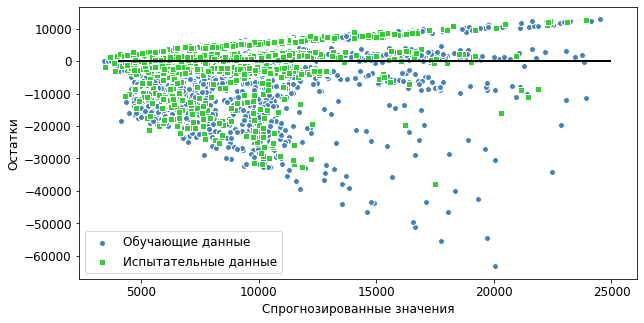

In [158]:
#Посмотрим на график остатков
y_train_pred=lr.predict(X_train_std)
y_valid_pred=lr.predict(X_valid_std)
plt.figure(figsize=(10, 5))
plt.scatter(y_train_pred, y_train_pred-y_train, c='steelblue', marker='o', edgecolor='white', label='Обучающие данные')
plt.scatter(y_valid_pred, y_valid_pred-y_valid, c='limegreen', marker='s', edgecolor='white', label='Испытательные данные')
plt.xlabel('Спрогнозированные значения')
plt.ylabel('Остатки')
plt.legend(loc='lower left')
plt.hlines(y=0, xmin=4000, xmax=25000, color='black', lw=2)
None

На графике видны повторяющиеся шаблоны, это значит, что модель неспособна захватывать какую-то объясняющую информацию, которая просочилась в остатки

In [159]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [160]:
#Посмотрим на коэффициент детерминации R^2 и на средний квадрат ошибки

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_valid, y_valid_pred)))
print('R^2 при обучении: %.3f, при испытании %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_valid, y_valid_pred)))

MSE train: 39864762.628, test: 36953538.491
R^2 при обучении: 0.177, при испытании 0.123


Коэффициент детерминации на валидационной выборке оказался равным 0.123. Значит, обнаружить нормальную линейную зависимость модель не может.

In [57]:
#Попробуем обучить модель только на числовых признаках
X=data[num_cols]
y=data[target]
X_train, X_valid, y_train, y_valid=train_test_split(X, y, test_size=0.2, random_state=0)
stdsc=StandardScaler()
X_train_std=stdsc.fit_transform(X_train)
X_valid_std=stdsc.transform(X_valid)

In [58]:
lr=LinearRegression(n_jobs=-1)
lr.fit(X_train_std, y_train)

LinearRegression(n_jobs=-1)

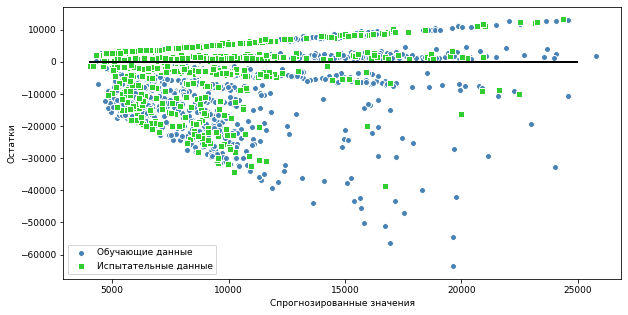

In [59]:
#Посмотрим на график остатков
y_train_pred=lr.predict(X_train_std)
y_valid_pred=lr.predict(X_valid_std)
plt.figure(figsize=(10, 5))
plt.scatter(y_train_pred, y_train_pred-y_train, c='steelblue', marker='o', edgecolor='white', label='Обучающие данные')
plt.scatter(y_valid_pred, y_valid_pred-y_valid, c='limegreen', marker='s', edgecolor='white', label='Испытательные данные')
plt.xlabel('Спрогнозированные значения')
plt.ylabel('Остатки')
plt.legend(loc='lower left')
plt.hlines(y=0, xmin=4000, xmax=25000, color='black', lw=2)
None

In [60]:
#Посмотрим на коэффициент детерминации R^2
from sklearn.metrics import r2_score
print('R^2 при обучении: %.3f, при испытании %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_valid, y_valid_pred)))

R^2 при обучении: 0.169, при испытании 0.116


Качество стало еще хуже

Оставим из числовых признаков, только те, которые имели положительную корреляцию с таргетом: Monthly Premium Auto, Total Claim Amount,Income из категориальных оставим Vehicle Class, Renew Offer Type, Policy Type, Policy, Coverage

In [161]:
features=['Monthly Premium Auto',
          'Total Claim Amount',
          'Income',
          'Vehicle Class',
          'Renew Offer Type',
          'Policy Type',
          'Policy',
          'Coverage']
X=data[features]
y=data[target]

In [162]:
X=pd.get_dummies(X)

In [163]:
X.head()

,Monthly Premium Auto,Total Claim Amount,Income,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Renew Offer Type_Offer1,...,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Coverage_Basic,Coverage_Extended,Coverage_Premium
0,69,384.811147,56274,0,0,0,0,0,1,1,...,1,0,0,0,0,0,0,1,0,0
1,94,1131.464935,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,108,566.472247,48767,0,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,1
3,106,529.881344,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,73,138.130879,43836,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0


In [164]:
X_train, X_valid, y_train, y_valid=train_test_split(X, y, test_size=0.2, random_state=0)
stdsc=StandardScaler()
X_train_std=stdsc.fit_transform(X_train)
X_valid_std=stdsc.transform(X_valid)

In [165]:
lr=LinearRegression(n_jobs=-1)
lr.fit(X_train_std, y_train)

LinearRegression(n_jobs=-1)

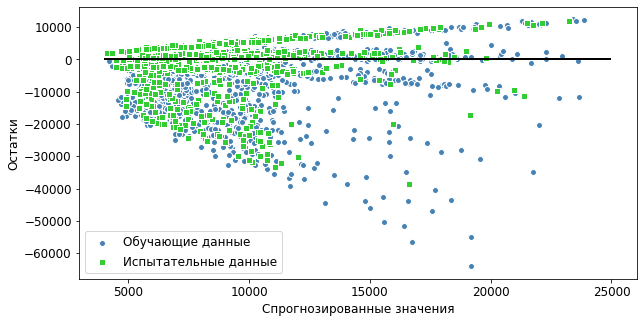

In [166]:
#Посмотрим на график остатков
y_train_pred=lr.predict(X_train_std)
y_valid_pred=lr.predict(X_valid_std)
plt.figure(figsize=(10, 5))
plt.scatter(y_train_pred, y_train_pred-y_train, c='steelblue', marker='o', edgecolor='white', label='Обучающие данные')
plt.scatter(y_valid_pred, y_valid_pred-y_valid, c='limegreen', marker='s', edgecolor='white', label='Испытательные данные')
plt.xlabel('Спрогнозированные значения')
plt.ylabel('Остатки')
plt.legend(loc='lower left')
plt.hlines(y=0, xmin=4000, xmax=25000, color='black', lw=2)
None

In [167]:
#Посмотрим на коэффициент детерминации R^2
from sklearn.metrics import r2_score
print('R^2 при обучении: %.3f, при испытании %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_valid, y_valid_pred)))

R^2 при обучении: 0.173, при испытании 0.121


## Decision tree

In [168]:
#Вернемся к первоначальному набору признаков и попробуем обучить модель на основе дерева принятия решений
from sklearn.tree import DecisionTreeRegressor

In [172]:
X=data[cat_cols+num_cols]
y=data[target]

In [173]:
X['Gender'] = np.where(X['Gender'] == 'F', 1.0, X['Gender'])
X['Gender'] = np.where(X['Gender'] == 'M', 0.0, X['Gender'])
X['Gender']=pd.to_numeric(X.Gender, errors='coerce')
X['Response'] = np.where(X['Response'] == 'Yes', 1.0, X['Response'])
X['Response'] = np.where(X['Response'] == 'No', 0.0, X['Response'])
X['Response']=pd.to_numeric(X['Response'], errors='coerce')
X=pd.get_dummies(X)
X_train, X_valid, y_train, y_valid=train_test_split(X, y, test_size=0.2, random_state=0)

<ipython-input-173-cb7e84fd6bb5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = np.where(X['Gender'] == 'F', 1.0, X['Gender'])
<ipython-input-173-cb7e84fd6bb5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = np.where(X['Gender'] == 'M', 0.0, X['Gender'])
<ipython-input-173-cb7e84fd6bb5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [71]:
tree=DecisionTreeRegressor()

In [72]:
tree.fit(X_train, y_train)

DecisionTreeRegressor()

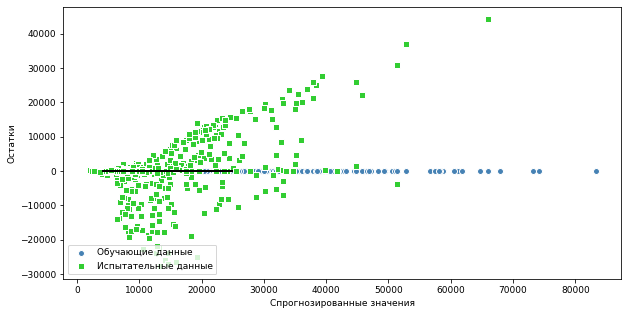

In [73]:
#Посмотрим на график остатков
y_train_pred=tree.predict(X_train)
y_valid_pred=tree.predict(X_valid)
plt.figure(figsize=(10, 5))
plt.scatter(y_train_pred, y_train_pred-y_train, c='steelblue', marker='o', edgecolor='white', label='Обучающие данные')
plt.scatter(y_valid_pred, y_valid_pred-y_valid, c='limegreen', marker='s', edgecolor='white', label='Испытательные данные')
plt.xlabel('Спрогнозированные значения')
plt.ylabel('Остатки')
plt.legend(loc='lower left')
plt.hlines(y=0, xmin=4000, xmax=25000, color='black', lw=2)
None

In [74]:
#Посмотрим на коэффициент детерминации R^2
print('R^2 при обучении: %.3f, при испытании %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_valid, y_valid_pred)))

R^2 при обучении: 1.000, при испытании 0.484


уже лучше, мы использовали дефолтные параметры дерева и оно сильно переобучилось, о чем говорит r2_score=1 на обучающих данных, попробуем поискать оптимальную глубину дерева через грид серч

In [75]:
from sklearn.model_selection import GridSearchCV

In [175]:
parameters = {'max_depth':range(1, 15)}

In [176]:
tree=DecisionTreeRegressor()
clf = GridSearchCV(tree, parameters)

In [177]:
clf.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 15)})

In [79]:
clf.best_params_

{'max_depth': 5}

Оптимальная глубина дерева = 5

In [178]:
model=clf.best_estimator_

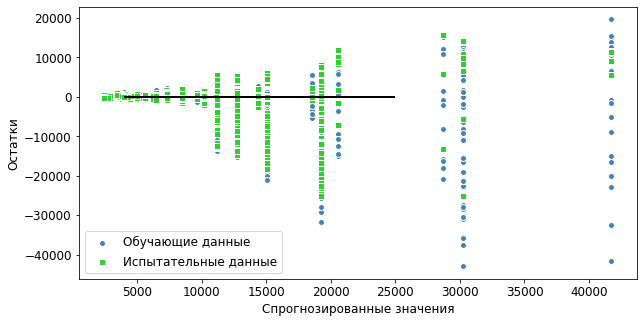

In [179]:
#Посмотрим на график остатков
y_train_pred=model.predict(X_train)
y_valid_pred=model.predict(X_valid)
plt.figure(figsize=(10, 5))
plt.scatter(y_train_pred, y_train_pred-y_train, c='steelblue', marker='o', edgecolor='white', label='Обучающие данные')
plt.scatter(y_valid_pred, y_valid_pred-y_valid, c='limegreen', marker='s', edgecolor='white', label='Испытательные данные')
plt.xlabel('Спрогнозированные значения')
plt.ylabel('Остатки')
plt.legend(loc='lower left')
plt.hlines(y=0, xmin=4000, xmax=25000, color='black', lw=2)
None

In [180]:
#Посмотрим на коэффициент детерминации R^2
print('R^2 при обучении: %.3f, при испытании %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_valid, y_valid_pred)))

R^2 при обучении: 0.695, при испытании 0.656


## Random forest

In [83]:
from sklearn.ensemble import RandomForestRegressor

In [181]:
#Попробуем обучить дефолтный случайный лес
forest=RandomForestRegressor(n_jobs=-1)
forest.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

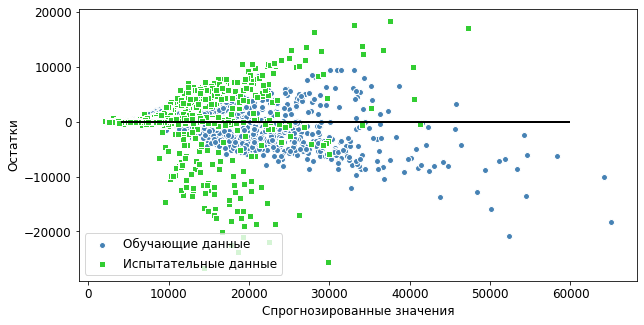

In [182]:
#Посмотрим на график остатков
y_train_pred=forest.predict(X_train)
y_valid_pred=forest.predict(X_valid)
plt.figure(figsize=(10, 5))
plt.scatter(y_train_pred, y_train_pred-y_train, c='steelblue', marker='o', edgecolor='white', label='Обучающие данные')
plt.scatter(y_valid_pred, y_valid_pred-y_valid, c='limegreen', marker='s', edgecolor='white', label='Испытательные данные')
plt.xlabel('Спрогнозированные значения')
plt.ylabel('Остатки')
plt.legend(loc='lower left')
plt.hlines(y=0, xmin=4000, xmax=60000, color='black', lw=2)
None

In [183]:
#Посмотрим на коэффициент детерминации R^2 и RMSE:
print('RMSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred, squared=False),
        mean_squared_error(y_valid, y_valid_pred, squared=False)))
print('R^2 при обучении: %.3f, при испытании %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_valid, y_valid_pred)))

RMSE train: 1423.043, test: 3629.383
R^2 при обучении: 0.958, при испытании 0.688


In [187]:
#Теперь попробуем найти оптимальные параметры через поиск по сетке
parameters = {'max_depth':range(10, 20), 'n_estimators':[400, 800, 1000]}
forest=RandomForestRegressor()
clf = GridSearchCV(forest, parameters, n_jobs=-1)

In [188]:
clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(10, 20),
                         'n_estimators': [400, 800, 1000]})

In [189]:
clf.best_params_

{'max_depth': 19, 'n_estimators': 800}

Оптимальное количество деревьев 800.   
Оптимальная глубина дерева 19.

In [190]:
model=clf.best_estimator_

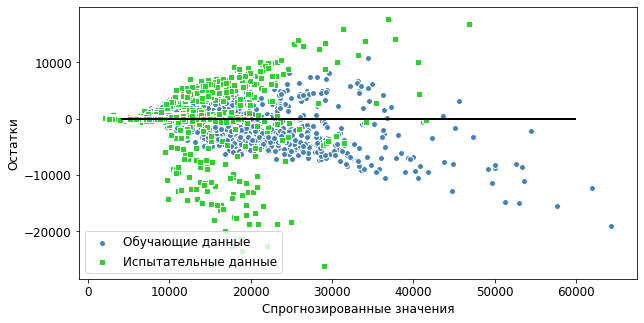

In [191]:
#Посмотрим на график остатков
y_train_pred=model.predict(X_train)
y_valid_pred=model.predict(X_valid)
plt.figure(figsize=(10, 5))
plt.scatter(y_train_pred, y_train_pred-y_train, c='steelblue', marker='o', edgecolor='white', label='Обучающие данные')
plt.scatter(y_valid_pred, y_valid_pred-y_valid, c='limegreen', marker='s', edgecolor='white', label='Испытательные данные')
plt.xlabel('Спрогнозированные значения')
plt.ylabel('Остатки')
plt.legend(loc='lower left')
plt.hlines(y=0, xmin=4000, xmax=60000, color='black', lw=2)
None

In [192]:
#Посмотрим на RMSE и коэффициент детерминации R^2 
print('RMSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred, squared=False),
        mean_squared_error(y_valid, y_valid_pred, squared=False)))
print('R^2 при обучении: %.3f, при испытании %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_valid, y_valid_pred)))

RMSE train: 1452.555, test: 3586.212
R^2 при обучении: 0.956, при испытании 0.695


#### Признаки, отсортированные в порядке значимости для модели "леса"

<AxesSubplot:>

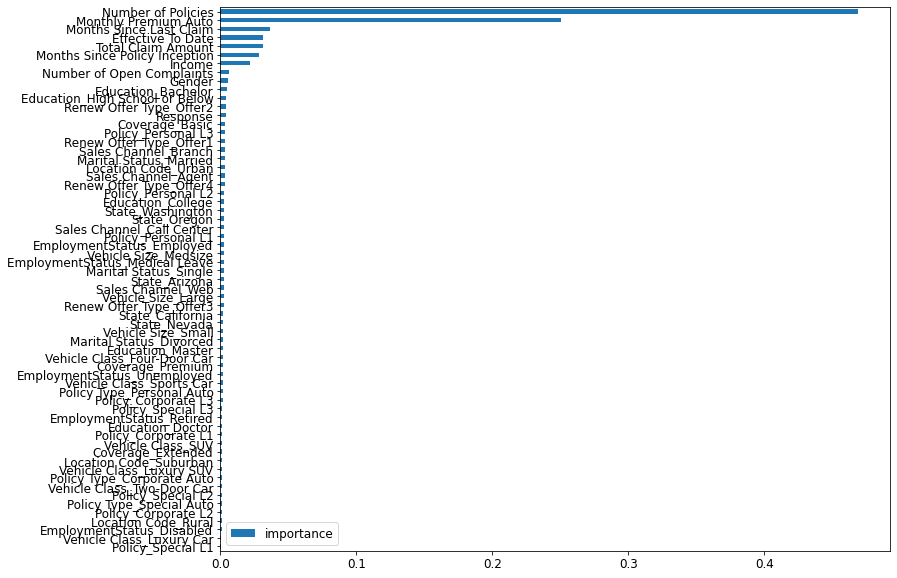

In [204]:
imp = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 10))

## Boosting 

In [304]:
#Теперь попробуем применить градиентный бустинг
from catboost import CatBoostRegressor

In [205]:
#Категориальные признаки без кодирования
X=data[cat_cols+num_cols]
y=data[target]

In [314]:
X_train, X_valid, y_train, y_valid=train_test_split(X, y, test_size=0.2, random_state=0)

In [315]:
#Обучим регрессор с дефолтными параметрами
rgr=CatBoostRegressor(cat_features=cat_cols)
rgr.fit(X_train, y_train)

Learning rate set to 0.055609
0:	learn: 6711.9721724	total: 13.1ms	remaining: 13.1s
1:	learn: 6477.3112791	total: 23ms	remaining: 11.5s
2:	learn: 6262.3965377	total: 32.4ms	remaining: 10.8s
3:	learn: 6063.1384908	total: 40.5ms	remaining: 10.1s
4:	learn: 5879.4801503	total: 49.1ms	remaining: 9.78s
5:	learn: 5705.7272647	total: 57.1ms	remaining: 9.46s
6:	learn: 5548.3700820	total: 65.8ms	remaining: 9.33s
7:	learn: 5401.7310725	total: 74.8ms	remaining: 9.27s
8:	learn: 5267.3099219	total: 83.6ms	remaining: 9.2s
9:	learn: 5146.3149769	total: 91.9ms	remaining: 9.1s
10:	learn: 5031.4150692	total: 100ms	remaining: 9.04s
11:	learn: 4929.6678714	total: 109ms	remaining: 8.98s
12:	learn: 4831.1260163	total: 117ms	remaining: 8.88s
13:	learn: 4744.3160947	total: 124ms	remaining: 8.73s
14:	learn: 4669.6081665	total: 132ms	remaining: 8.64s
15:	learn: 4589.5634172	total: 140ms	remaining: 8.62s
16:	learn: 4519.1354435	total: 149ms	remaining: 8.59s
17:	learn: 4454.6352251	total: 156ms	remaining: 8.52s
18

167:	learn: 3566.9985028	total: 1.6s	remaining: 7.93s
168:	learn: 3566.3691863	total: 1.61s	remaining: 7.94s
169:	learn: 3566.2767944	total: 1.63s	remaining: 7.94s
170:	learn: 3565.5735178	total: 1.64s	remaining: 7.93s
171:	learn: 3565.1905305	total: 1.65s	remaining: 7.92s
172:	learn: 3565.0066028	total: 1.65s	remaining: 7.91s
173:	learn: 3564.3653529	total: 1.66s	remaining: 7.88s
174:	learn: 3563.1526005	total: 1.67s	remaining: 7.86s
175:	learn: 3558.6039028	total: 1.68s	remaining: 7.86s
176:	learn: 3558.4195664	total: 1.69s	remaining: 7.85s
177:	learn: 3557.5672480	total: 1.69s	remaining: 7.82s
178:	learn: 3557.4281221	total: 1.7s	remaining: 7.8s
179:	learn: 3557.1205565	total: 1.71s	remaining: 7.79s
180:	learn: 3557.0557345	total: 1.72s	remaining: 7.78s
181:	learn: 3555.9304237	total: 1.73s	remaining: 7.77s
182:	learn: 3554.6802151	total: 1.74s	remaining: 7.76s
183:	learn: 3551.4431175	total: 1.75s	remaining: 7.75s
184:	learn: 3550.9191648	total: 1.76s	remaining: 7.75s
185:	learn: 3

322:	learn: 3442.0474926	total: 3.21s	remaining: 6.74s
323:	learn: 3441.2758634	total: 3.23s	remaining: 6.73s
324:	learn: 3441.2058051	total: 3.24s	remaining: 6.72s
325:	learn: 3441.1708101	total: 3.25s	remaining: 6.71s
326:	learn: 3441.1413276	total: 3.25s	remaining: 6.7s
327:	learn: 3440.5400190	total: 3.26s	remaining: 6.68s
328:	learn: 3440.5048635	total: 3.27s	remaining: 6.67s
329:	learn: 3439.9404212	total: 3.28s	remaining: 6.66s
330:	learn: 3438.5279775	total: 3.29s	remaining: 6.65s
331:	learn: 3437.5879832	total: 3.3s	remaining: 6.64s
332:	learn: 3437.1471286	total: 3.31s	remaining: 6.63s
333:	learn: 3434.3998698	total: 3.32s	remaining: 6.62s
334:	learn: 3432.3735655	total: 3.33s	remaining: 6.61s
335:	learn: 3428.5896075	total: 3.34s	remaining: 6.61s
336:	learn: 3427.6785315	total: 3.35s	remaining: 6.59s
337:	learn: 3427.2516594	total: 3.36s	remaining: 6.58s
338:	learn: 3426.3538327	total: 3.37s	remaining: 6.58s
339:	learn: 3425.4704823	total: 3.38s	remaining: 6.57s
340:	learn: 

475:	learn: 3318.7166042	total: 4.82s	remaining: 5.31s
476:	learn: 3318.2827540	total: 4.84s	remaining: 5.3s
477:	learn: 3317.6200248	total: 4.85s	remaining: 5.3s
478:	learn: 3316.4797724	total: 4.86s	remaining: 5.29s
479:	learn: 3316.2032478	total: 4.87s	remaining: 5.28s
480:	learn: 3315.5068394	total: 4.88s	remaining: 5.27s
481:	learn: 3314.5674712	total: 4.89s	remaining: 5.26s
482:	learn: 3313.7224368	total: 4.91s	remaining: 5.25s
483:	learn: 3313.4750596	total: 4.92s	remaining: 5.24s
484:	learn: 3312.8188703	total: 4.93s	remaining: 5.23s
485:	learn: 3312.3202686	total: 4.94s	remaining: 5.22s
486:	learn: 3311.5566811	total: 4.95s	remaining: 5.21s
487:	learn: 3311.1519721	total: 4.96s	remaining: 5.2s
488:	learn: 3309.4807059	total: 4.97s	remaining: 5.19s
489:	learn: 3307.9833069	total: 4.98s	remaining: 5.18s
490:	learn: 3307.6601715	total: 4.99s	remaining: 5.17s
491:	learn: 3307.2825624	total: 5s	remaining: 5.16s
492:	learn: 3307.0124957	total: 5.01s	remaining: 5.16s
493:	learn: 3306

641:	learn: 3203.2349875	total: 6.66s	remaining: 3.71s
642:	learn: 3203.0408868	total: 6.67s	remaining: 3.7s
643:	learn: 3200.7119515	total: 6.68s	remaining: 3.69s
644:	learn: 3200.4556625	total: 6.69s	remaining: 3.68s
645:	learn: 3200.3674635	total: 6.7s	remaining: 3.67s
646:	learn: 3200.1680579	total: 6.71s	remaining: 3.66s
647:	learn: 3200.0261795	total: 6.73s	remaining: 3.65s
648:	learn: 3199.8537392	total: 6.74s	remaining: 3.64s
649:	learn: 3199.7476353	total: 6.75s	remaining: 3.63s
650:	learn: 3199.5172503	total: 6.76s	remaining: 3.62s
651:	learn: 3198.3081890	total: 6.77s	remaining: 3.61s
652:	learn: 3198.0559764	total: 6.78s	remaining: 3.6s
653:	learn: 3197.9739170	total: 6.79s	remaining: 3.59s
654:	learn: 3197.9223255	total: 6.8s	remaining: 3.58s
655:	learn: 3197.7308162	total: 6.81s	remaining: 3.57s
656:	learn: 3197.5504087	total: 6.82s	remaining: 3.56s
657:	learn: 3196.7681553	total: 6.83s	remaining: 3.55s
658:	learn: 3196.6093400	total: 6.85s	remaining: 3.54s
659:	learn: 31

804:	learn: 3113.1851350	total: 8.48s	remaining: 2.05s
805:	learn: 3112.8449305	total: 8.49s	remaining: 2.04s
806:	learn: 3112.3954922	total: 8.5s	remaining: 2.03s
807:	learn: 3110.6571945	total: 8.51s	remaining: 2.02s
808:	learn: 3109.0016823	total: 8.53s	remaining: 2.01s
809:	learn: 3108.3096042	total: 8.54s	remaining: 2s
810:	learn: 3107.5014781	total: 8.55s	remaining: 1.99s
811:	learn: 3107.1397582	total: 8.56s	remaining: 1.98s
812:	learn: 3106.8145415	total: 8.57s	remaining: 1.97s
813:	learn: 3106.6382998	total: 8.58s	remaining: 1.96s
814:	learn: 3106.4573098	total: 8.59s	remaining: 1.95s
815:	learn: 3106.0986993	total: 8.61s	remaining: 1.94s
816:	learn: 3106.0245143	total: 8.62s	remaining: 1.93s
817:	learn: 3106.0047124	total: 8.63s	remaining: 1.92s
818:	learn: 3105.6600615	total: 8.64s	remaining: 1.91s
819:	learn: 3105.4668394	total: 8.65s	remaining: 1.9s
820:	learn: 3104.1354772	total: 8.66s	remaining: 1.89s
821:	learn: 3104.0994646	total: 8.67s	remaining: 1.88s
822:	learn: 310

960:	learn: 3020.6152697	total: 10.5s	remaining: 428ms
961:	learn: 3020.5568978	total: 10.6s	remaining: 417ms
962:	learn: 3019.9915578	total: 10.6s	remaining: 406ms
963:	learn: 3019.9043216	total: 10.6s	remaining: 396ms
964:	learn: 3019.7823121	total: 10.6s	remaining: 385ms
965:	learn: 3018.6980350	total: 10.6s	remaining: 374ms
966:	learn: 3017.9254087	total: 10.6s	remaining: 363ms
967:	learn: 3017.8646284	total: 10.7s	remaining: 353ms
968:	learn: 3017.7500648	total: 10.7s	remaining: 342ms
969:	learn: 3017.4185081	total: 10.7s	remaining: 331ms
970:	learn: 3015.8967926	total: 10.7s	remaining: 320ms
971:	learn: 3015.2539577	total: 10.7s	remaining: 309ms
972:	learn: 3014.8585926	total: 10.7s	remaining: 298ms
973:	learn: 3014.7202625	total: 10.8s	remaining: 287ms
974:	learn: 3014.4594318	total: 10.8s	remaining: 277ms
975:	learn: 3014.4053482	total: 10.8s	remaining: 266ms
976:	learn: 3014.2781365	total: 10.8s	remaining: 255ms
977:	learn: 3014.2210360	total: 10.8s	remaining: 244ms
978:	learn

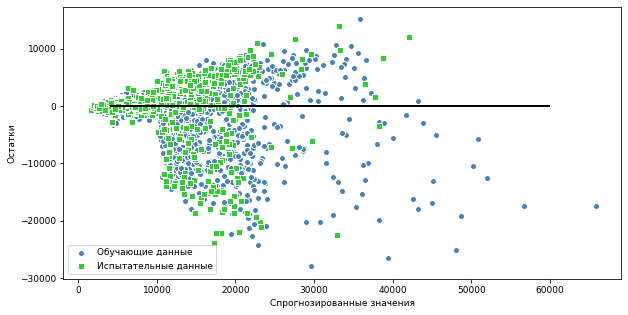

In [316]:
#Посмотрим на график остатков
y_train_pred=rgr.predict(X_train)
y_valid_pred=rgr.predict(X_valid)
plt.figure(figsize=(10, 5))
plt.scatter(y_train_pred, y_train_pred-y_train, c='steelblue', marker='o', edgecolor='white', label='Обучающие данные')
plt.scatter(y_valid_pred, y_valid_pred-y_valid, c='limegreen', marker='s', edgecolor='white', label='Испытательные данные')
plt.xlabel('Спрогнозированные значения')
plt.ylabel('Остатки')
plt.legend(loc='lower left')
plt.hlines(y=0, xmin=4000, xmax=60000, color='black', lw=2)
None

In [317]:
#Посмотрим на коэффициент детерминации R^2
print('R^2 при обучении: %.3f, при испытании %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_valid, y_valid_pred)))

R^2 при обучении: 0.794, при испытании 0.698


Дефолтный регрессор от катбуста дает хороший результат, попробуем подобрать оптимальные параметры с помощью поиска по сетке

In [326]:
#Перебираемые параметры
param={'num_boost_round':[700, 900], 'depth':[10, 15], 'l2_leaf_reg':[0.01, 0.1, 1]}

In [327]:
search=CatBoostRegressor(cat_features=cat_cols)
search.grid_search(param, X_train, y_train)


bestTest = 4230.488111
bestIteration = 680

0:	loss: 4230.4881106	best: 4230.4881106 (0)	total: 22.2s	remaining: 4m 4s

bestTest = 4203.266977
bestIteration = 620

1:	loss: 4203.2669772	best: 4203.2669772 (1)	total: 47.8s	remaining: 3m 59s

bestTest = 4229.351716
bestIteration = 602

2:	loss: 4229.3517158	best: 4203.2669772 (1)	total: 1m 14s	remaining: 3m 43s

bestTest = 4230.488111
bestIteration = 680

3:	loss: 4230.4881106	best: 4203.2669772 (1)	total: 1m 51s	remaining: 3m 42s

bestTest = 4202.078303
bestIteration = 712

4:	loss: 4202.0783027	best: 4202.0783027 (4)	total: 2m 27s	remaining: 3m 27s

bestTest = 4226.172254
bestIteration = 835

5:	loss: 4226.1722542	best: 4202.0783027 (4)	total: 3m 7s	remaining: 3m 7s

bestTest = 4473.738778
bestIteration = 412

6:	loss: 4473.7387783	best: 4202.0783027 (4)	total: 13m 52s	remaining: 9m 54s

bestTest = 4432.839028
bestIteration = 665

7:	loss: 4432.8390281	best: 4202.0783027 (4)	total: 24m 15s	remaining: 12m 7s

bestTest = 4402.899329
bes

{'params': {'depth': 10, 'iterations': 900, 'l2_leaf_reg': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
     

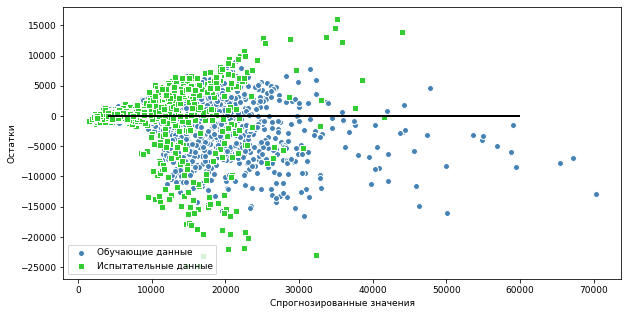

In [328]:
#Посмотрим на график остатков
y_train_pred=search.predict(X_train)
y_valid_pred=search.predict(X_valid)
plt.figure(figsize=(10, 5))
plt.scatter(y_train_pred, y_train_pred-y_train, c='steelblue', marker='o', edgecolor='white', label='Обучающие данные')
plt.scatter(y_valid_pred, y_valid_pred-y_valid, c='limegreen', marker='s', edgecolor='white', label='Испытательные данные')
plt.xlabel('Спрогнозированные значения')
plt.ylabel('Остатки')
plt.legend(loc='lower left')
plt.hlines(y=0, xmin=4000, xmax=60000, color='black', lw=2)
None

In [329]:
#Посмотрим на коэффициент детерминации R^2
print('R^2 при обучении: %.3f, при испытании %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_valid, y_valid_pred)))

R^2 при обучении: 0.909, при испытании 0.698


Поиск параметров по сетке не дал лучшего результата

#### Логарифируем целевую переменную

In [100]:
y_log = np.log(y)

In [110]:
y_log.shape[0]

9134

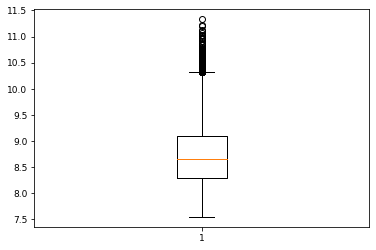

In [102]:
# Построю Boxplot
plt.boxplot(y_log)
plt.show()

Идея - оставить только данные, которые входят в 1,5 межквартильный размах

In [103]:
# quant = pd.DataFrame(y_log.quantile([0.25,0.5,0.75]))

In [104]:
# low = quant.iloc[0, 0] - 1.5 * (quant.iloc[2, 0] - quant.iloc[0, 0])
# print(low)

7.0803778658926175


In [105]:
# high = quant.iloc[2, 0] + 1.5 * (quant.iloc[2, 0] - quant.iloc[0, 0])
# print(high)

10.313001003057334


In [106]:
# y_log_quant = y_log[(low <= y_log) & (y_log >= high)]

In [109]:
# y_log_quant.shape[0]

185

In [236]:
# print('Осталось {:0.1f} % данных'.format(y_log_quant.shape[0]*100/y_log.shape[0]))

Слишком много данных исключено - идея не подходит

In [206]:
# Выведем "значимые" для Random forest признаки
imp.sort_values('importance', ascending = False).head(10)

,importance
Number of Policies,0.469024
Monthly Premium Auto,0.250652
Months Since Last Claim,0.036436
Effective To Date,0.031446
Total Claim Amount,0.031352
Months Since Policy Inception,0.028693
Income,0.021485
Number of Open Complaints,0.006362
Gender,0.005260
Education_Bachelor,0.004714


In [209]:
# Оставлю только их для построения моделей
X_best =data[['Number of Policies', 'Monthly Premium Auto', 'Months Since Last Claim', 'Effective To Date', 'Total Claim Amount', 'Months Since Policy Inception', 'Income']]

In [213]:
X_train, X_valid, y_train, y_valid = train_test_split(X_best, y_log, test_size=0.2, random_state=0)

In [214]:
forest_log = RandomForestRegressor(n_jobs=-1)
forest_log.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [233]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_valid, y_valid_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_valid, y_valid_pred)))

MSE train: 0.006, test: 0.038
R^2 train: 0.987, test: 0.906


In [229]:
y_test_exp = np.exp(y_valid)

In [230]:
y_test_pred_exp = np.exp(y_valid_pred)

In [235]:
print('RMSE test: %.3f' % (mean_squared_error(y_test_exp, y_test_pred_exp, squared=False)))

RMSE test: 3520.631


Выводы:  
- Простая модель линейной регрессии не очень хорошо работает с данными, на тестовых данных r2_score = 0.121;  
- По сравнению с ней, дерево принятия решений с подобранной глубиной max_depth=5, выдает r2_score = 0.656;  
- Ансамблевый метод случайного леса с подобранной глубиной max_depth=19 и колличеством деревьев n_estimators = 800, дает большийbr2_score = 0.695 на тестовых данных;                       
- Наилучший результат был получен методом градиентного бустинга, на тестовых данных r2_score = 0.698;  

Выбирая между моделями я склоняюсь к случайному лесу, т.к. заметной разницы в скоре не наблюдается, но работа метода, основанного на мажоритарном голосовании проще интерпретируется;